# Análisis de varianza (ANOVA) con Python

La técnica conocida como análisis de varianza (ANOVA), desarrollada por Ronald Fisher, es una herramienta fundamental para investigar el impacto de uno o más factores (cada uno con dos o más niveles) en la media de una variable continua. Es uno de los métodos estadísticos utilizados para comparar las medias de dos o más grupos.

La premisa básica de los diferentes tipos de ANOVA parte de una hipótesis nula que establece que la media de la variable estudiada es la misma en todos los grupos, en contraste con la hipótesis alternativa que sostiene que al menos dos medias difieren significativamente entre sí. El ANOVA permite comparar múltiples medias mediante el análisis de las varianzas.

La idea subyacente detrás del funcionamiento básico de un ANOVA es la siguiente:

- Calcular la media de cada grupo.
- Calcular la varianza de las medias de los grupos. Esta varianza se explica por la influencia del factor "grupo" y se conoce como varianza entre grupos.
- Calcular las varianzas internas de cada grupo y obtener su promedio. Esta varianza no se explica por el factor "grupo" y se conoce como varianza dentro de los grupos.

De acuerdo con la hipótesis nula de que todas las observaciones provienen de la misma población (con la misma media y varianza), se espera que la varianza entre grupos y la varianza dentro de los grupos sean iguales. A medida que las medias de los grupos se alejan unas de otras, la varianza entre grupos aumenta y deja de ser igual a la varianza dentro de los grupos.

## El ANOVA
El ANOVA estudia un estadístico denominado "$F_{ratio}$", que se calcula como el cociente entre la varianza de las medias de los grupos (intervarianza) y el promedio de la varianza dentro de los grupos (intravarianza). Este estadístico sigue una distribución F de Fisher-Snedecor. Bajo la hipótesis nula, el valor del estadístico F es 1, ya que la intervianza es igual a la intravarianza. A medida que las medias de los grupos se separan, la intervarianza se vuelve mayor en comparación con la intravarianza, lo que resulta en valores de F superiores a 1 y una menor probabilidad asociada (p-value).

Específicamente, si $S^2_1$ es la varianza de una muestra de tamaño $N_1$ extraída de una población normal con varianza $\sigma^2_1$, y $S^2_2$ es la varianza de una muestra de tamaño $N_2$ extraída de una población normal con varianza $\sigma^2_2$, y ambas muestras son independientes, el cociente:

$$F = \frac{(S^2_1 / \sigma^2_1)}{(S^2_2 / \sigma^2_2)}$$

sigue una distribución F de Fisher-Snedecor con ($N_1$ y $N_2$) grados de libertad. En el caso del ANOVA, dado que dos de las condiciones son la normalidad de los grupos y la homocedasticidad de la varianza ($\sigma^2_1 = \sigma^2_1$), el valor de F se obtiene dividiendo las dos varianzas calculadas a partir de las muestras (intervarianza e intravarianza).

Existen diferentes tipos de ANOVA dependiendo de si se trata de datos independientes (ANOVA entre sujetos), datos pareados (ANOVA de mediciones repetidas), comparación de la variable dependiente cuantitativa frente a los niveles de una única variable cualitativa o factor (ANOVA de una vía) o frente a dos factores (ANOVA de dos vías). Este último puede ser aditivo o de interacción (los factores son independientes o no lo son). Cada tipo de ANOVA tiene requisitos específicos.

## Tamaño del efecto  η2
 El tamaño del efecto de un ANOVA, es el valor que permite medir cuanta varianza en la variable dependiente es resultado de la influencia de la variable cualitativa independiente, o lo que es lo mismo, cuánto afecta la variable independiente (factor) a la variable dependiente. En el ANOVA, la medida del tamaño del efecto más empleada es  η2
  que se define como:

$$η2=\frac{SumaCuadradosentregrupos}{SumaCuadradostotal}$$
 
Los niveles de clasificación más empleados para el tamaño del efecto son:

- 0.01 = pequeño
- 0.06 = mediano
- 0.14 = grande

In [1]:
!pip3 install pingouin --break-system-packages

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

Vamos a hacer esto con un ejemplo... Digamos que tenemos una ferretería y tenemos en la misma "tornillos", "arandelas", "tuercas", "clavos" y "tachuelas" y cada una de varios calibres. Queremos establecer las hipótesis de que dichos grupos son distintos.

In [3]:
np.random.seed(12)

races =   ["tornillos","arandelas","tuercas","clavos","tachuelas"]

# Generate random data
inventario = np.random.choice(a= races, p = [0.05, 0.15 ,0.25, 0.05, 0.5], size=1000)

medidas = stats.poisson.rvs(loc=18, mu=30, size=1000) #Tamaños en milímetros

####====================================================================================================
####===========================================GUARDAR PARA DESPUES=====================================
####====================================================================================================
#clavos = stats.poisson.rvs(loc=18, mu=33, size=1000) #Tamaños en milímetros
#medidas = np.where(inventario=="clavos", clavos, medidas)
####====================================================================================================
####====================================================================================================

# Group age data by race
data = pd.DataFrame({"inventario":inventario,"medidas":medidas})
groups = data.groupby("inventario").groups

# Etract individual groups
tornillos = medidas[groups["tornillos"]]
arandelas = medidas[groups["arandelas"]]
tuercas = medidas[groups["tuercas"]]
clavos = medidas[groups["clavos"]]
tachuelas = medidas[groups["tachuelas"]]

# Perform the ANOVA
stats.f_oneway(tornillos,arandelas,tuercas,clavos,tachuelas)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

La prueba arroja un estadístico F de 1,774 y un valor p de 0,1317, lo que indica que no hay diferencias significativas entre las medias de cada grupo.

Otra forma de realizar una prueba ANOVA es utilizar la biblioteca statsmodels, que permite especificar un modelo con una sintaxis de fórmula que refleja la utilizada por el lenguaje de programación R. Los usuarios de R pueden encontrar este método más familiar. Los usuarios de R pueden encontrar este método más familiar:

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('medidas ~ inventario',                 # Model formula
            data = data).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

               sum_sq     df         F    PR(>F)
inventario    199.369    4.0  1.774469  0.131732
Residual    27948.102  995.0       NaN       NaN


Como puede ver, el método statsmodels produjo el mismo estadístico F y valor P (listado como PR(<F)) que el método stats.f_oneway.

In [5]:
# Média y desviación típica por grupo
# ==============================================================================
data.groupby('inventario').agg(['mean', 'std'])

medidas          
                 mean       std
inventario                     
arandelas   47.551020  5.209559
clavos      48.860000  5.166651
tachuelas   47.467961  5.021011
tornillos   48.886364  5.503554
tuercas     48.127049  5.885415

## Análisis gráfico

Dos de las representación más útiles antes de realizar un ANOVA son los gráficos Box-Plot y los Violin-Plot.

/home/neno/.local/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/neno/.local/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


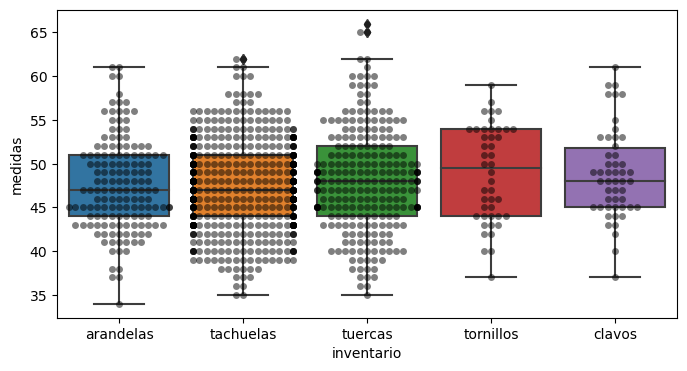

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="inventario", y="medidas", data=data, ax=ax)
sns.swarmplot(x="inventario", y="medidas", data=data, color='black', alpha = 0.5, ax=ax);

Este tipo de representación permite identificar de forma preliminar si existen asimetrías, datos atípicos o diferencia de varianzas. En este caso, los 5 grupos parecen seguir una distribución simétrica. En el nivel IF se detectan algunos valores extremos que habrá que estudiar con detalle por si fuese necesario eliminarlos. El tamaño de las cajas es similar para todos los niveles por lo que no hay indicios de falta de homocedasticidad.

## Verificar condiciones para un ANOVA
### Independencia
Los grupos (variable categórica) y jugadores dentro de cada grupo son independientes entre ellos ya que se ha hecho un muestreo aleatorio de jugadores de toda la liga (no solo de un mismo equipo).
### Distribución normal de las observaciones
La variable cuantitativa debe de distribuirse de forma normal en cada uno de los grupos. El estudio de normalidad puede hacerse de forma gráfica (qqplot) o con test de hipótesis.

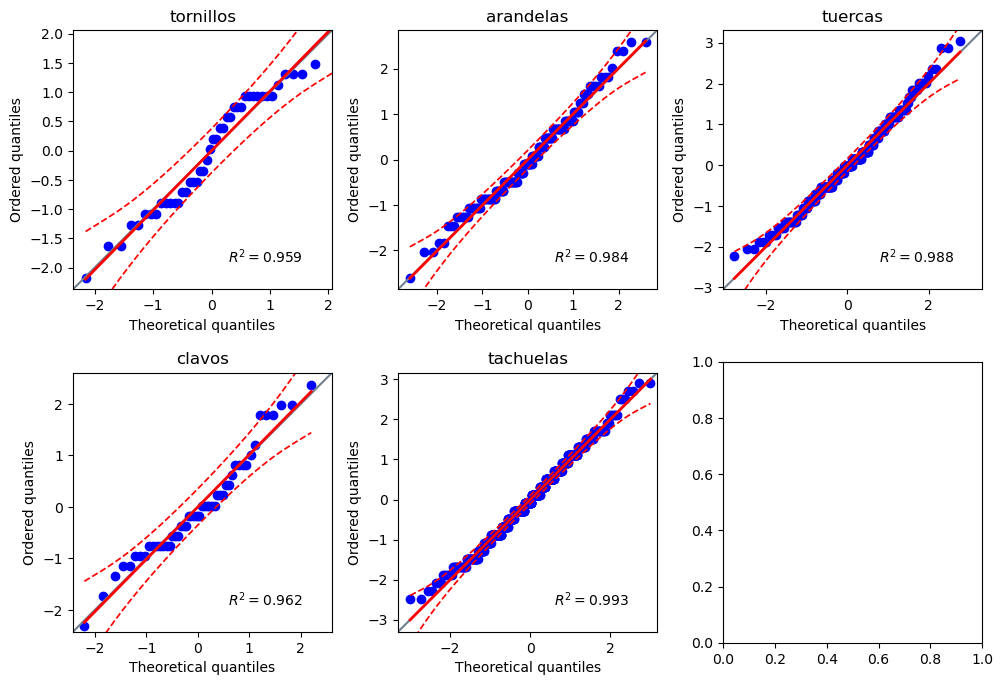

In [7]:
# Gráficos qqplot
# ==============================================================================
fig, axs = plt.subplots(2, 3, figsize=(10, 7))
pg.qqplot(data.loc[data["inventario"]=="tornillos", 'medidas'], dist='norm', ax=axs[0,0])
axs[0,0].set_title("tornillos")
pg.qqplot(data.loc[data["inventario"]=="arandelas", 'medidas'], dist='norm', ax=axs[0,1])
axs[0,1].set_title("arandelas")
pg.qqplot(data.loc[data["inventario"]=="tuercas", 'medidas'], dist='norm', ax=axs[0,2])
axs[0,2].set_title("tuercas")
pg.qqplot(data.loc[data["inventario"]=="clavos", 'medidas'], dist='norm', ax=axs[1,0])
axs[1,0].set_title("clavos")
pg.qqplot(data.loc[data["inventario"]=="tachuelas", 'medidas'], dist='norm', ax=axs[1,1])
axs[1,1].set_title("tachuelas")
plt.tight_layout()


In [8]:
#sns.histplot(data[data["inventario"]=="tuercas"]["medidas"],bins=20,kde=True)

In [9]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=data, dv='medidas', group='inventario')

,W,pval,normal
inventario,,,
arandelas,0.983178,0.069215,True
tachuelas,0.992187,0.008423,False
tuercas,0.986496,0.021085,False
tornillos,0.951856,0.064519,True
clavos,0.962465,0.112762,True


Ni el análisis gráfico ni los test de hipótesis no muestran evidencias de falta de normalidad.

## Varianza constante entre grupos (homocedasticidad)

Dado que hay un grupo IF que se encuentra en el límite para aceptar que se distribuye de forma normal, el test de Levene más adecuado que el de Bartlett.

## Test de homocedasticidad
El test de homocedasticidad es una herramienta estadística utilizada para evaluar si la varianza de los errores o residuos de un modelo estadístico es constante en diferentes niveles o grupos de una variable independiente. En otras palabras, se utiliza para verificar si la dispersión de los valores residuales es constante a lo largo de los diferentes niveles de una variable explicativa.

La hipótesis nula del test de homocedasticidad establece que la varianza de los errores es constante (homocedasticidad), mientras que la hipótesis alternativa sugiere que hay una heterocedasticidad, es decir, la varianza de los errores no es constante en los diferentes niveles de la variable explicativa.

Existen diferentes métodos para realizar el test de homocedasticidad, siendo el más común el Test de Levene y el Test de Bartlett. Ambos métodos comparan la varianza de los residuos entre los grupos o niveles de la variable independiente. Si el p-valor resultante del test es menor que un nivel de significancia predefinido, se rechaza la hipótesis nula y se concluye que existe evidencia de heterocedasticidad en los datos.

El test de homocedasticidad es especialmente importante en el análisis de regresión, ya que la heterocedasticidad puede afectar la precisión de los estimadores de los coeficientes y la inferencia estadística. En presencia de heterocedasticidad, pueden ser necesarios ajustes o transformaciones de los datos para obtener resultados más confiables.

In [10]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=data, dv='medidas', group='inventario', method='levene')

,W,pval,equal_var
levene,1.738983,0.139164,True


De acuerdo al test Levene, no hay evidencias significativas que indiquen falta de homocedasticidad.

## Test ANOVA

In [11]:
# Test ANOVA de una vía (One-way ANOVA)
# ==============================================================================
pg.anova(data=data, dv='medidas', between='inventario', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,inventario,199.369,4,49.842250,1.774469,0.131732,0.007083
1,Within,27948.102,995,28.088545,NaN,NaN,NaN


Un p-value es superior a 0.1 es una evidencia muy dévil en contra de la hipótesis núla de que todos los grupos tienen la misma media. El valor de eta cuadrado (η2) es de 0.007, lo que puede considerarse como un tamaño de efecto pequeño.

In [12]:
# Post-hoc Tukey test
# ==============================================================================
pg.pairwise_tukey(data=data, dv='medidas', between='inventario').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,arandelas,clavos,47.551,48.860,-1.309,0.868,-1.509,0.557,-0.251
1,arandelas,tachuelas,47.551,47.468,0.083,0.496,0.168,1.000,0.016
2,arandelas,tornillos,47.551,48.886,-1.335,0.911,-1.466,0.585,-0.252
3,arandelas,tuercas,47.551,48.127,-0.576,0.553,-1.041,0.836,-0.102
4,clavos,tachuelas,48.860,47.468,1.392,0.785,1.773,0.390,0.276
5,clavos,tornillos,48.860,48.886,-0.026,1.096,-0.024,1.000,-0.005
6,clavos,tuercas,48.860,48.127,0.733,0.823,0.891,0.900,0.127
7,tachuelas,tornillos,47.468,48.886,-1.418,0.832,-1.704,0.432,-0.280
8,tachuelas,tuercas,47.468,48.127,-0.659,0.412,-1.600,0.498,-0.124
9,tornillos,tuercas,48.886,48.127,0.759,0.868,0.875,0.906,0.130


Como era de esperar, no se encuentra diferencia significativa entre ningún par de medias.

group1,group2,meandiff,p-adj,lower,upper,reject
arandelas,clavos,1.309,0.5571,-1.0622,3.6801,False
arandelas,tachuelas,-0.0831,0.9998,-1.4374,1.2713,False
arandelas,tornillos,1.3353,0.5848,-1.1535,3.8242,False
arandelas,tuercas,0.576,0.8362,-0.9362,2.0882,False
clavos,tachuelas,-1.392,0.3899,-3.5374,0.7533,False
clavos,tornillos,0.0264,1.0,-2.9674,3.0202,False
clavos,tuercas,-0.733,0.9003,-2.9813,1.5154,False
tachuelas,tornillos,1.4184,0.4319,-0.8564,3.6932,False
tachuelas,tuercas,0.6591,0.4976,-0.4665,1.7847,False
tornillos,tuercas,-0.7593,0.9062,-3.1315,1.6129,False


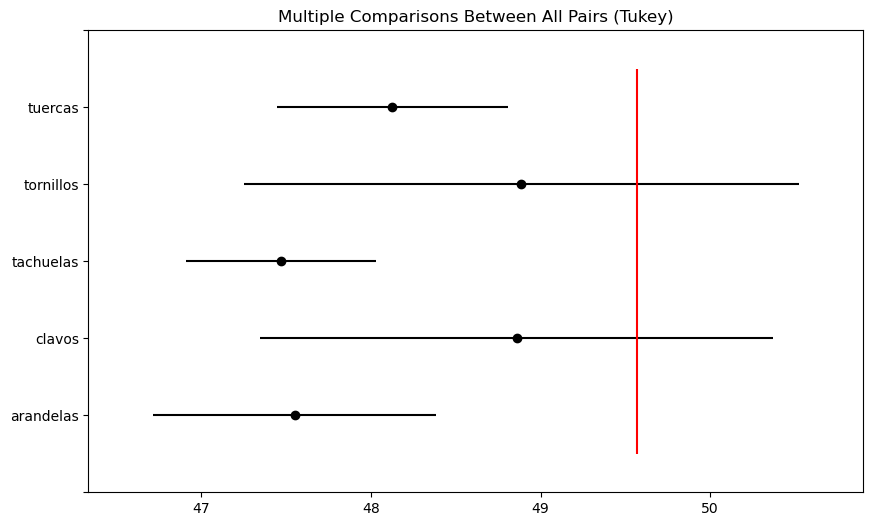

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=medidas,     # Data
                          groups=inventario,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary
